In [5]:
pip install -U scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 1.4 MB/s eta 0:00:07
                                              0.1/8.3 MB 1.1 MB/s eta 0:00:08
                                              0.2/8.3 MB 1.5 MB/s eta 0:00:06
     -                                        0.3/8.3 MB 1.6 MB/s eta 0:00:05
     --                                       0.5/8.3 MB 2.2 MB/s eta 0:00:04
     ---                                      0.8/8.3 MB 2.8 MB/s eta 0:00:03
     -----                                    1.1/8.3 MB 3.3 MB/s eta 0:00:03
     ------                                   1.4/8.3 MB 3.7 MB/s eta 0:00:02
     --------                                 1.7/8.3 MB 4.0 MB/s eta 0:00:02
     ---------                                2.0/8.3 MB 4.3 MB/s eta 0:00:02
     -----------                              2.3/8.3 MB 4.5 MB/s eta 0:00:02
     ------------                             2.6/8.3 MB 4.8 MB/s eta 0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


In [21]:
data = pd.read_csv('E:/Data Analyst/Dataset/New folder/netflix_titles.csv')

In [22]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
data = data.drop(columns = 'description',axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [26]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


In [27]:
data.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [28]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [30]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  year_added    8790 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 892.7+ KB


In [32]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


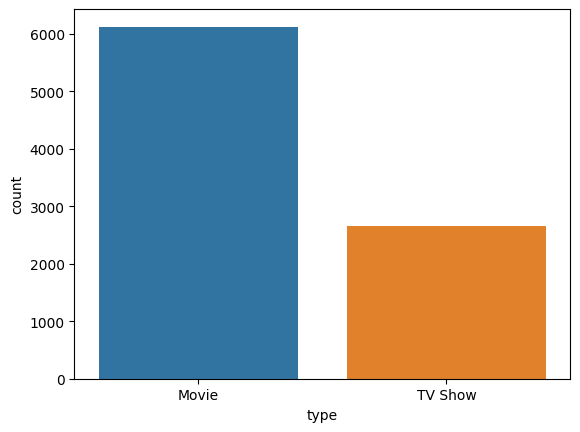

In [33]:
sns.countplot(x='type', data=data)
plt.show()

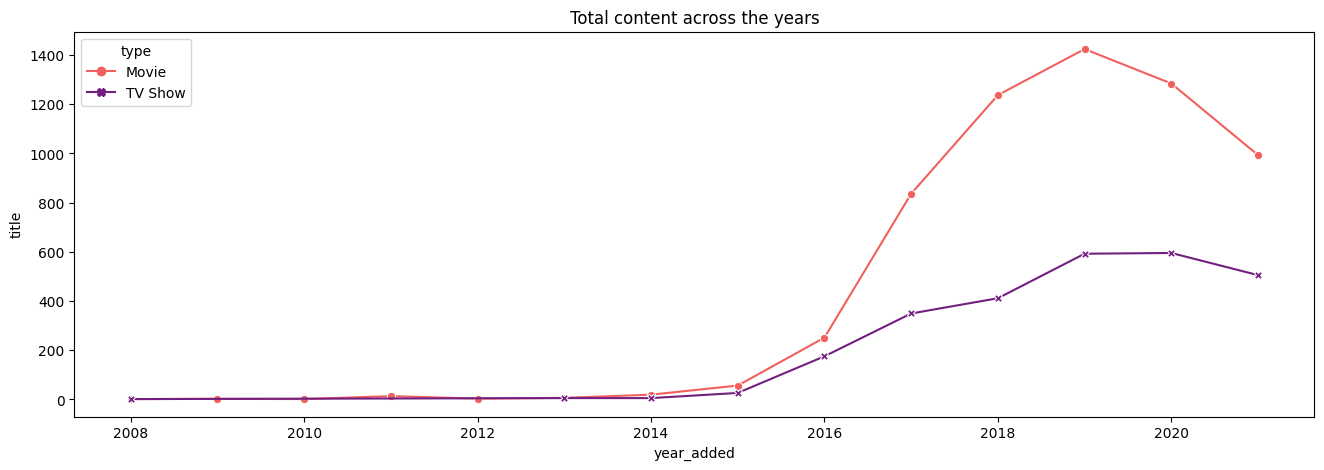

In [35]:
type_year = (data.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()

In [36]:
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)

In [37]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,0,0,1972,2294,5351,603,1712,72,4,210,273,13
1,1111,1,1088,3049,409,426,1711,73,8,110,413,13
2,2222,1,2646,2104,6284,603,1711,73,8,0,241,13
3,3333,1,3499,3049,5351,603,1711,73,8,0,296,13
4,4444,1,3853,3049,4802,251,1711,73,8,110,392,13
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8654,0,8753,978,4664,603,1107,59,5,70,268,11
8803,8655,1,8756,3049,5351,603,986,70,11,110,423,11
8804,8656,0,8757,3630,3224,603,1091,61,5,206,206,11
8805,8657,0,8760,3246,7049,603,1154,58,3,206,124,12


In [38]:
X = data.drop(columns = ['type'])
y = data['type']

In [39]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [40]:
X_scaled = scaler.transform(X)
X_scaled

array([[-1.73185377, -0.95469695, -0.20971444, ...,  1.31834824,
         0.01008469,  1.35139698],
       [-1.29401339, -1.3030776 ,  0.44929593, ...,  0.18439787,
         1.07744648,  1.35139698],
       [-0.85617302, -0.68907642, -0.3755581 , ..., -1.06294753,
        -0.23388372,  1.35139698],
       ...,
       [ 1.67943904,  1.71924271,  0.9564284 , ...,  1.27299023,
        -0.50072417,  0.08032754],
       [ 1.67983313,  1.72042499,  0.62124962, ...,  1.27299023,
        -1.12589322,  0.71586226],
       [ 1.68022723,  1.72200138,  0.34018825, ..., -0.88151547,
         0.42178138,  0.08032754]])

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)

# LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lr = logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(y_pred)

[0 1 0 ... 0 1 0]


In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8230209281164695

Confusion Matrix:
 [[1380  157]
 [ 232  429]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1537
           1       0.73      0.65      0.69       661

    accuracy                           0.82      2198
   macro avg       0.79      0.77      0.78      2198
weighted avg       0.82      0.82      0.82      2198



In [44]:
y_pred=logreg.predict(X_train)
print(y_pred)

[0 0 0 ... 0 1 0]


In [45]:
print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.8155339805825242

Confusion Matrix:
 [[4086  503]
 [ 713 1290]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4589
           1       0.72      0.64      0.68      2003

    accuracy                           0.82      6592
   macro avg       0.79      0.77      0.78      6592
weighted avg       0.81      0.82      0.81      6592



#Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9904458598726115

Confusion Matrix:
 [[1526   11]
 [  10  651]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1537
           1       0.98      0.98      0.98       661

    accuracy                           0.99      2198
   macro avg       0.99      0.99      0.99      2198
weighted avg       0.99      0.99      0.99      2198



In [49]:
y_pred = clf.predict(X_train)
accuracy = clf.score(X_train, y_train)

In [50]:
print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[4589    0]
 [   0 2003]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4589
           1       1.00      1.00      1.00      2003

    accuracy                           1.00      6592
   macro avg       1.00      1.00      1.00      6592
weighted avg       1.00      1.00      1.00      6592



#Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)


In [53]:
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))

Accuracy: 0.9913557779799818

Confusion Matrix:
 [[1534    3]
 [  16  645]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1537
           1       1.00      0.98      0.99       661

    accuracy                           0.99      2198
   macro avg       0.99      0.99      0.99      2198
weighted avg       0.99      0.99      0.99      2198



In [54]:
y_rf_pred = rf.predict(X_train)

In [55]:
print("Accuracy:", accuracy_score(y_train, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_train, y_rf_pred))

Accuracy: 0.9995449029126213

Confusion Matrix:
 [[4589    0]
 [   3 2000]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4589
           1       1.00      1.00      1.00      2003

    accuracy                           1.00      6592
   macro avg       1.00      1.00      1.00      6592
weighted avg       1.00      1.00      1.00      6592



#Naive Bayes


In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8553230209281165

Confusion Matrix:
 [[1307  230]
 [  88  573]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1537
           1       0.71      0.87      0.78       661

    accuracy                           0.86      2198
   macro avg       0.83      0.86      0.84      2198
weighted avg       0.87      0.86      0.86      2198



In [59]:
y_pred = gnb.predict(X_train)

In [60]:
print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.8633191747572816

Confusion Matrix:
 [[3961  628]
 [ 273 1730]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      4589
           1       0.73      0.86      0.79      2003

    accuracy                           0.86      6592
   macro avg       0.83      0.86      0.85      6592
weighted avg       0.87      0.86      0.87      6592

